# Stock code Data Importation

The following notebook is used for building modules for getting Stock Code Information

Stock codes are imported from the file `stock_data.xls.xlsx` as temporary measures, the API calls to _global.krx.co.kr_ need more work.

- []


__Updates__
- 2022/11/18 -- API calls made to retrieve code 
- 2022/11/24 -- Stock Data Retrieved via API calls with 

In [1]:
# check if yfapi package is installed
# yfapi is a package that allows you to get stock data from yahoo finance

# !pip install yfapi

# yfinance is a package that allows you to get stock data from yahoo finance, but it is no longer supported
# and might have some issues

# !pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library To make request for Stock codes
import requests

# Library to get the data from Yahoo Finance
import yfinance as yf


### Stock Code Importation

There are two ways to import stock codes, one is to web crawl the stock codes from the KRX website, the other is to make API calls to _https://iex.lewagon.com/stable/ref-data/region/kr/symbols_.

__KRX Crawling__

Importing the stock codes can be retrieved via crawling KRX webpage, but due to asynchronous nature of the webpage, it is not possible to retrieve the data in a single call. Therefore API calls to retrieve code to be used for further data retrieval needs to be made to _https://global.krx.co.kr/contents/COM/GenerateOTP.jspx_ and with the code retrieved, the data can be retrieved via _https://global.krx.co.kr/contents/GLB/99/GLB99000001.jspx_.

__iex Cloud__

The API calls to _https://iex.lewagon.com/stable/ref-data/region/kr/symbols_ can be used to retrieve the stock codes. The data retrieved is in JSON format, and the data can be converted to a pandas dataframe. However, the retrieved data with the stock codes are not in compliance with the stock code format used in the yfinance library. Therefore, the stock codes retrieved from the API calls need to be converted to the format used in the yfinance library.


```python

In [3]:
# make get request to 'https://iex.lewagon.com/stable/ref-data/region/kr/symbols' and save it as a dataframe (stock_df)
url = 'https://iex.lewagon.com/stable/ref-data/region/kr/symbols'
response = requests.get(url)
stock_df = pd.DataFrame(response.json())
stock_df.sample(10, random_state=42)

,symbol,exchange,exchangeSuffix,exchangeName,exchangeSegment,exchangeSegmentName,name,date,type,iexId,region,currency,isEnabled,figi,cik,lei
449,010690-KP,XKRX,KP,Korea Exchange Stock Market,XKRX,Korea Exchange Stock Market,Hwashin,2022-11-24,cs,IEX_515342445A4A2D52,KR,KRW,True,BBG000BFWRZ0,None,None
2098,222800-KQ,XKOS,KQ,Korea Exchange Kosdaq,XKOS,Korea Exchange Kosdaq,Simmtech Co.Ltd,2022-11-24,cs,None,KR,KRW,True,BBG0085YRGT6,None,None
299,005870-KP,XKRX,KP,Korea Exchange Stock Market,XKRX,Korea Exchange Stock Market,Huneed Technologies,2022-11-24,cs,IEX_434648475A4D2D52,KR,KRW,True,BBG000BG67J9,None,None
3068,419540-KQ,XKOS,KQ,Korea Exchange Kosdaq,XKOS,Korea Exchange Kosdaq,Bistos Co. Ltd,2022-11-24,cs,None,KR,KRW,True,BBG01B2KKDC3,None,None
1590,114120-KQ,XKOS,KQ,Korea Exchange Kosdaq,XKOS,Korea Exchange Kosdaq,Crucialtec Co Ltd,2022-11-24,cs,None,KR,KRW,True,BBG000R1J818,None,None
2090,221840-KQ,XKOS,KQ,Korea Exchange Kosdaq,XKOS,Korea Exchange Kosdaq,Hizeaero Co.Ltd,2022-11-24,cs,None,KR,KRW,True,BBG00BC2XPJ5,None,None
2630,316670-KP,XKRX,KP,Korea Exchange Stock Market,XKRX,Korea Exchange Stock Market,Woori Credit Suisse Asset Management Co. Ltd -...,2022-11-24,et,IEX_4638514E44392D52,KR,KRW,True,BBG00N2YY246,None,None
93,001527-KP,XKRX,KP,Korea Exchange Stock Market,XKRX,Korea Exchange Stock Market,Tongyang - PRF PERPETUAL KRW 500 - 2nd,2022-11-24,ps,IEX_4B485A394B5A2D52,KR,KRW,True,BBG000BG3RL5,None,None
1749,139660-KP,XKRX,KP,Korea Exchange Stock Market,XKRX,Korea Exchange Stock Market,Woori Credit Suisse Asset Management Co. Ltd -...,2022-11-24,et,IEX_4E38383738432D52,KR,KRW,True,BBG001LWTCF9,None,None
1789,145720-KP,XKRX,KP,Korea Exchange Stock Market,XKRX,Korea Exchange Stock Market,Dentium Co. Ltd.,2022-11-24,cs,IEX_53474B5A435A2D52,KR,KRW,True,BBG00FVVQLF2,None,None


In [4]:
# Stock Symbol needs str '-' to be replaced with '.' and 'KP' replaced as 'KS'

# replace '-' with '.' in the column 'symbol'
stock_df['symbol'] = stock_df['symbol'].str.replace('-', '.')
# replace str value ending with 'KP' with 'KS' in the column 'symbol'
stock_df['symbol'] = stock_df['symbol'].str.replace('KP', 'KS')

### Stock Time Series Data Retrieval

After retrieving stock codes, the stock time series data can be retrieved via the yfinance library. The data retrieved is in the form of a pandas dataframe, and the data can be converted to a csv file for further analysis.

__yfapi__

The yfapi library is used to retrieve the stock time series data. The library is a wrapper for the yfinance library, and the library can be installed via _pip install yfapi_. The library can be used to retrieve the stock time series data in the form of a pandas dataframe, and the data can be converted to a csv file for further analysis.

__yfinance__

The yfinance library is used to retrieve the stock time series data. The library can be installed via _pip install yfinance_. The library can be used to retrieve the stock time series data in the form of a pandas dataframe, and the data can be converted to a csv file for further analysis.
__Warning__

However, since yfinance is not a stable library, the data retrieved from the library may not be accurate. Therefore, the data retrieved from the library should be used with caution.


In [5]:
rand_stock = yf.Ticker(stock_df['symbol'].sample(random_state=42).values[0])
rand_stock_info = rand_stock.info
rand_stock_history = rand_stock.history(period="max")

In [18]:
# check number of keys in rand_stock_info
len(rand_stock_info.keys())

152

In [31]:
rand_stock_info

{'zip': '770-280',
 'sector': 'Consumer Cyclical',
 'longBusinessSummary': 'HWASHIN CO.,Ltd manufactures and sells automobile chassis and body components. It offers chassis products, such as front and rear cross member type, front and rear lower arm, rear CTBA, rear trailing and assist arm, rear axle housing assembly, front upper arm, pedal, and fuel tank; and body parts comprising reinf side outer, fender apron and member, center and rear floor, cowl complete and cross bar, bumper rail, and sun roof reinf products. The company was formerly known as Hwashin Industrial Corporation and changed its name to HWASHIN CO.,Ltd in March 1995. HWASHIN CO.,Ltd was founded in 1969 and is headquartered in Yeongcheon, South Korea.',
 'city': 'Yeongcheon-Si',
 'phone': '82 5 4330 5000',
 'country': 'South Korea',
 'companyOfficers': [],
 'website': 'https://www.hwashin.co.kr',
 'maxAge': 1,
 'address1': '412 Eonha-dong',
 'fax': '82 5 4331 7568',
 'industry': 'Auto Parts',
 'ebitdaMargins': 0.08126,


<AxesSubplot:xlabel='Date'>

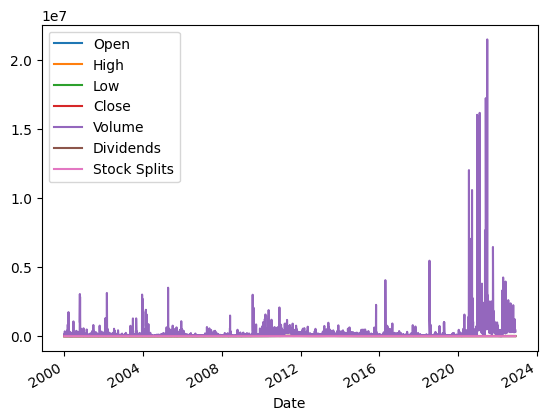

In [32]:
# plot rand_stock_history
rand_stock_history.plot()

In [4]:
from yfapi import YahooFinance

# from stock_df get a random value from symbol column
symbol = stock_df.sample(1, random_state=42).iloc[0]['symbol']
# make a request to YahooFinance API with the symbol
response = YahooFinance(symbol,'1h','max')
response.all_values()

,ticker,date,close,open,low,high,volume
0,010690.KS,31/01/2000 15:00:00,820.0,761.0,530.0,834.0,2161000
1,010690.KS,29/02/2000 15:00:00,995.0,820.0,751.0,1355.0,9898000
2,010690.KS,31/03/2000 15:00:00,757.0,971.0,723.0,1035.0,2413000
3,010690.KS,30/04/2000 15:00:00,715.0,757.0,550.0,880.0,1944000
4,010690.KS,31/05/2000 15:00:00,885.0,709.0,653.0,1010.0,3202000
...,...,...,...,...,...,...,...
270,010690.KS,31/07/2022 15:00:00,10850.0,9550.0,9260.0,11050.0,18933665
271,010690.KS,31/08/2022 15:00:00,8370.0,10700.0,8270.0,12250.0,15777206
272,010690.KS,30/09/2022 15:00:00,8920.0,8370.0,7150.0,9180.0,13572529
273,010690.KS,31/10/2022 15:00:00,8880.0,8930.0,8520.0,9790.0,8366357
